In [1]:
import numpy as np
import matplotlib.pyplot as plt
import arch
import pandas as pd

In [15]:
def gaussian(x, sd, mu):
    return (1/(sd * np.sqrt(2 * np.pi))) * np.exp( -1/2 * (((x - mu)/sd)**2))

$$e^{x^2}$$

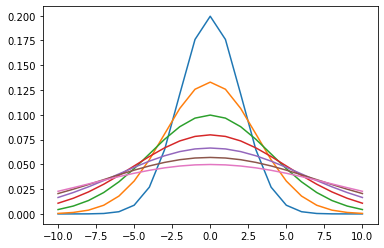

In [18]:
plt.plot(range(-10, 11), [gaussian(x, 2, 0) for x in range(-10, 11)])
plt.plot(range(-10, 11), [gaussian(x, 3, 0) for x in range(-10, 11)])
plt.plot(range(-10, 11), [gaussian(x, 4, 0) for x in range(-10, 11)])
plt.plot(range(-10, 11), [gaussian(x, 5, 0) for x in range(-10, 11)])
plt.plot(range(-10, 11), [gaussian(x, 6, 0) for x in range(-10, 11)])
plt.plot(range(-10, 11), [gaussian(x, 7, 0) for x in range(-10, 11)])
plt.plot(range(-10, 11), [gaussian(x, 8, 0) for x in range(-10, 11)])

In [158]:
data =  -100 * np.array([gaussian(x, 2, 0) +  np.random.normal( scale= 0.01 * abs(1/x))   for x in np.linspace(-10, 10, 150)])  + 100

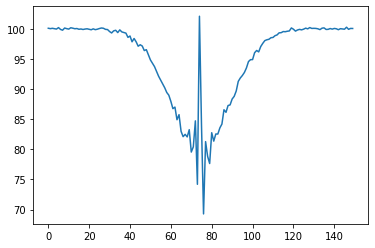

In [159]:
plt.plot(data)

In [160]:
pd.DataFrame(data)

,0
0,100.084926
1,100.017799
2,100.075047
3,100.008367
4,99.948258
...,...
145,99.923790
146,100.256473
147,99.907161
148,100.055710


In [168]:
log_diff = np.log(pd.DataFrame(data)/pd.DataFrame(data).shift(1)) *100

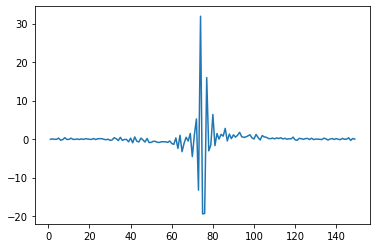

In [169]:
plt.plot(log_diff)

In [172]:
am = arch.arch_model(log_diff)
res = am.fit()

Iteration:      1,   Func. Count:     11,   Neg. LLF: nan
Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 11
            Gradient evaluations: 2


C:\Users\vinic\.conda\envs\strange\lib\site-packages\arch\univariate\base.py:707: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [202]:
def random_walk(n):
    return [np.random.normal(scale=100) + i**2  for i in range(n)] 

In [203]:
x1 = random_walk(365)

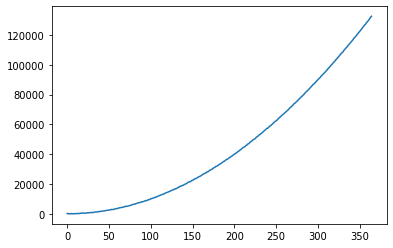

In [204]:
plt.plot(x1)

In [176]:
am = arch.arch_model(x1)
res = am.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1581.7467322361033
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1458.0927512765961
Iteration:      3,   Func. Count:     23,   Neg. LLF: 507.6161661102386
Iteration:      4,   Func. Count:     29,   Neg. LLF: 507.7961749936079
Iteration:      5,   Func. Count:     35,   Neg. LLF: 507.3604166899145
Iteration:      6,   Func. Count:     41,   Neg. LLF: 507.26676754485044
Iteration:      7,   Func. Count:     46,   Neg. LLF: 507.21830566989127
Iteration:      8,   Func. Count:     51,   Neg. LLF: 507.2184655911227
Iteration:      9,   Func. Count:     57,   Neg. LLF: 507.2209795922704
Iteration:     10,   Func. Count:     63,   Neg. LLF: 507.2171853089636
Iteration:     11,   Func. Count:     67,   Neg. LLF: 507.2171853134282
Optimization terminated successfully    (Exit mode 0)
            Current function value: 507.2171853089636
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations

In [177]:
res

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -507.217
Distribution:                  Normal   AIC:                           1022.43
Method:            Maximum Likelihood   BIC:                           1038.03
                                        No. Observations:                  365
Date:                Mon, Apr 05 2021   Df Residuals:                      361
Time:                        22:15:09   Df Model:                            4
                                 Mean Model                                
                  coef    std err          t      P>|t|    95.0% Conf. Int.
---------------------------------------------------------------------------
mu         -3.9816e-03  5.085e-02 -7.830e-02      0.938 [ -0.

In [179]:
res.params

mu         -3.981575e-03
omega       1.546653e-02
alpha[1]    1.850065e-13
beta[1]     9.838469e-01
Name: params, dtype: float64

In [28]:
def rw(n, mu, sd):
    return np.array([np.random.normal(mu, sd) for i in range(n) ]) + np.array(range(n)) + n

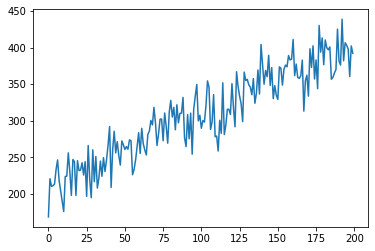

In [29]:
plt.plot(rw(200,10, 25))

<ipython-input-30-6e5fad92c699>:1: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(pd.DataFrame(rw(200,10, 250))/pd.DataFrame(rw(200,10, 2)).shift(1) ))


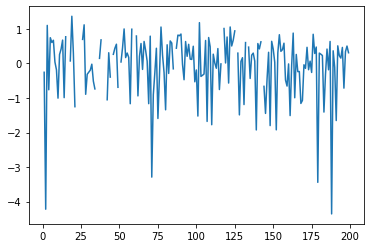

In [30]:
plt.plot(np.log(pd.DataFrame(rw(200,10, 250))/pd.DataFrame(rw(200,10, 2)).shift(1) ))